In [ ]:
import numpy as np, os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output()

import lightgbm as lgb
from sklearn.model_selection import train_test_split




""" 
In Order to Use it in your own machine, just change the HOME_DIR to your current working directory
where there is a folder named data in which the  csv files are there. 
 """
HOME_DIR = '/content/'
DATA_DIR = os.path.join(HOME_DIR, 'data')

train_df = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
test_df = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))
sub = pd.read_csv(os.path.join(DATA_DIR, 'sample_submission.csv'))


clear_output()

## Utility Functions

In [ ]:
def get_days(d0, d1):
    """
    d0 : earlier data
    d1 : later date
    returns : number of days between those two dates.   
    """
    d0 = pd.to_datetime(d0)
    d1 = pd.to_datetime(d1)
    delta = d1 - d0
    return delta.days

In [ ]:
train_df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [ ]:
# train_df['Resource Allocation'].fillna(train_df['Resource Allocation'].median() , inplace = True)
# train_df['Mental Fatigue Score'].fillna(train_df['Mental Fatigue Score'].median() , inplace = True)

train_df.dropna(inplace=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           18590 non-null  object 
 1   Date of Joining       18590 non-null  object 
 2   Gender                18590 non-null  object 
 3   Company Type          18590 non-null  object 
 4   WFH Setup Available   18590 non-null  object 
 5   Designation           18590 non-null  float64
 6   Resource Allocation   18590 non-null  float64
 7   Mental Fatigue Score  18590 non-null  float64
 8   Burn Rate             18590 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.4+ MB


## Burn Rate vs (Designation and Mental Fatigue)

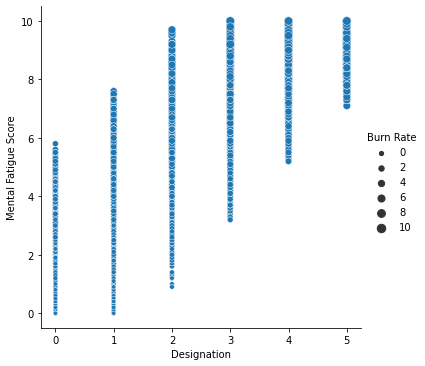

In [ ]:
train_df2 = train_df.copy()
train_df2['Burn Rate'] = train_df['Burn Rate']*10

sns.relplot(x="Designation", y="Mental Fatigue Score", size ='Burn Rate',  data=train_df2);

## Resource Allocation

In [ ]:

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           18590 non-null  object 
 1   Date of Joining       18590 non-null  object 
 2   Gender                18590 non-null  object 
 3   Company Type          18590 non-null  object 
 4   WFH Setup Available   18590 non-null  object 
 5   Designation           18590 non-null  float64
 6   Resource Allocation   18590 non-null  float64
 7   Mental Fatigue Score  18590 non-null  float64
 8   Burn Rate             18590 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.4+ MB


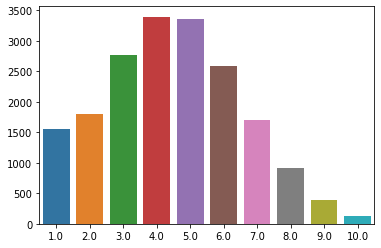

In [ ]:
resource_counts = train_df['Resource Allocation'].value_counts()

fig = sns.barplot(y=resource_counts.values, x=resource_counts.index)
# fig.set(title = 'Feature Importance In Classification');

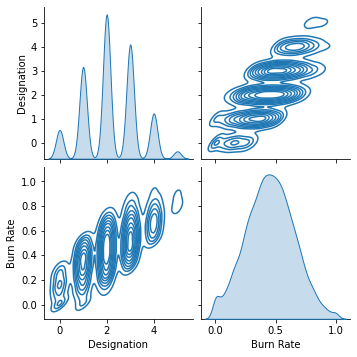

In [ ]:
sns.pairplot(train_df[['Gender', 'Designation',  'Burn Rate']], kind='kde')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           18590 non-null  object 
 1   Date of Joining       18590 non-null  object 
 2   Gender                18590 non-null  object 
 3   Company Type          18590 non-null  object 
 4   WFH Setup Available   18590 non-null  object 
 5   Designation           18590 non-null  float64
 6   Resource Allocation   18590 non-null  float64
 7   Mental Fatigue Score  18590 non-null  float64
 8   Burn Rate             18590 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.4+ MB


# <font color='blue'>Feature Engineering </font>

In [ ]:
dataset = [train_df, test_df]

for data in dataset:
    data['Date of Joining'] = pd.to_datetime(data['Date of Joining'])
    data['Gender'] = [1 if (gender == 'Male') else 0  for gender in data.Gender]
    data['Company Type'] = [1 if (ctype == 'Service') else 0  for ctype in data['Company Type']]
    data['WFH Setup Available'] = [1 if (wfh == 'Yes') else 0  for wfh in data['WFH Setup Available']]
    data['JobDuration'] = [get_days(d, '2009-2-1') for d in data['Date of Joining']]
    # data['']



In [ ]:
test_df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,JobDuration
0,fffe31003300390039003000,2008-12-10,0,1,0,2.0,5.0,7.7,53
1,fffe31003300310037003800,2008-08-14,0,0,1,1.0,2.0,5.2,171
2,fffe33003400380035003900,2008-11-13,1,0,1,1.0,3.0,5.9,80
3,fffe3100370039003200,2008-02-07,0,1,0,3.0,6.0,4.6,360
4,fffe32003600390036003700,2008-07-17,0,0,0,2.0,5.0,6.4,199
...,...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,0,1,1,1.0,2.0,6.1,122
12246,fffe32003600330034003000,2008-03-31,0,0,1,2.0,4.0,5.9,307
12247,fffe31003800340039003000,2008-02-12,1,1,0,4.0,7.0,9.6,355
12248,fffe32003600380031003800,2008-02-06,1,1,0,3.0,6.0,6.7,361


In [ ]:
# Train Data Time Duration
train_df['Date of Joining'].min(), train_df['Date of Joining'].max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2008-12-31 00:00:00'))

In [ ]:
# Test Data Time Duration
test_df['Date of Joining'].min(), test_df['Date of Joining'].max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2008-12-31 00:00:00'))

In [ ]:
train_df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,JobDuration
0,fffe32003000360033003200,2008-09-30,0,1,0,2.0,3.0,3.8,0.16,124
1,fffe3700360033003500,2008-11-30,1,1,1,1.0,2.0,5.0,0.36,63
3,fffe32003400380032003900,2008-11-03,1,1,1,1.0,1.0,2.6,0.20,90
4,fffe31003900340031003600,2008-07-24,0,1,0,3.0,7.0,6.9,0.52,192
5,fffe3300350037003500,2008-11-26,1,0,1,2.0,4.0,3.6,0.29,67
...,...,...,...,...,...,...,...,...,...,...
22743,fffe3300390030003600,2008-12-15,0,0,1,1.0,3.0,6.0,0.48,48
22744,fffe32003500370033003200,2008-05-27,1,0,0,3.0,7.0,6.2,0.54,250
22746,fffe33003000350031003800,2008-01-19,0,0,1,3.0,6.0,6.7,0.59,379
22748,fffe33003300320036003900,2008-01-10,0,1,0,2.0,5.0,5.9,0.52,388


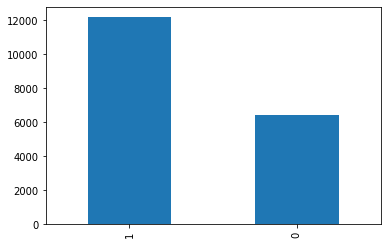

In [ ]:
train_df['Company Type'].value_counts().plot.bar()

# Data Staging


In [ ]:
# Selected features for training
features = ['Gender',   'JobDuration',  'Company Type',	'WFH Setup Available', 	
            'Designation', 'Resource Allocation',	'Mental Fatigue Score']

# Saving Normalizing Parameters for future use with train and test set
feature_min = train_df[features].min().values
feature_max = train_df[features].max().values

# Normalization 
train_df_norm = (train_df[features] - feature_min)/ (feature_max - feature_min)
X_test = (test_df[features] - feature_min)/ (feature_max - feature_min)

y = train_df['Burn Rate']
X_train, X_valid, y_train, y_valid = train_test_split( train_df_norm, y, test_size=0.2, random_state=1234)

# Modeling LightGBM


In [ ]:
# LGBM Parameters
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'l2_root'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    # "num_iterations": 100000,
    "n_estimators": 1000
}


gbm = lgb.LGBMRegressor(**hyper_params)




In [ ]:
gbm.fit(X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='auc',
        early_stopping_rounds=1000)

[1]	valid_0's auc: 0.99854	valid_0's rmse: 0.195257	valid_0's l2: 0.0381253
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's auc: 0.99854	valid_0's rmse: 0.194347	valid_0's l2: 0.0377708
[3]	valid_0's auc: 0.99854	valid_0's rmse: 0.193443	valid_0's l2: 0.0374203
[4]	valid_0's auc: 0.99854	valid_0's rmse: 0.192545	valid_0's l2: 0.0370736
[5]	valid_0's auc: 0.99854	valid_0's rmse: 0.191652	valid_0's l2: 0.0367303
[6]	valid_0's auc: 0.99854	valid_0's rmse: 0.19076	valid_0's l2: 0.0363896
[7]	valid_0's auc: 0.99858	valid_0's rmse: 0.189884	valid_0's l2: 0.0360559
[8]	valid_0's auc: 0.99858	valid_0's rmse: 0.189005	valid_0's l2: 0.0357229
[9]	valid_0's auc: 0.99858	valid_0's rmse: 0.188138	valid_0's l2: 0.0353959
[10]	valid_0's auc: 0.99858	valid_0's rmse: 0.187269	valid_0's l2: 0.0350697
[11]	valid_0's auc: 0.99858	valid_0's rmse: 0.186404	valid_0's l2: 0.0347464
[12]	valid_0's auc: 0.99858	valid_0's rmse: 0.185544	valid_0's l2: 0.0344267
[13]	valid_0's auc: 0.

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.005, max_bin=512,
              max_depth=8, metric=['l2', 'l2_root'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
              n_jobs=-1, num_leaves=128, objective='regression',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
              task='train', verbose=0)

In [ ]:
y_test_predicted = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [ ]:
submission = pd.DataFrame({'Employee ID' : test_df['Employee ID'], 'Burn Rate': y_test_predicted})
submission.to_csv('submission_auc_4.csv')

# Ensemble: 

In [ ]:
import random 

FOLD = 5; 
for i in range(FOLD):
    X_train, X_valid, y_train, y_valid = train_test_split( train_df_norm, y, test_size=0.2, random_state=random.randint(10, 1000))

    # gbm = lgb.LGBMRegressor(**hyper_params)
    gbm.fit(X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='auc',
        early_stopping_rounds=1000)
    
    y_test_predicted = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

    submission = pd.DataFrame({'Employee ID' : test_df['Employee ID'], 'Burn Rate': y_test_predicted})
    submission.to_csv(f'submission_auc_{i}.csv', index = False)

Streaming output truncated to the last 5000 lines.
[16]	valid_0's auc: 0.998654	valid_0's rmse: 0.184628	valid_0's l2: 0.0340875
[17]	valid_0's auc: 0.998654	valid_0's rmse: 0.183784	valid_0's l2: 0.0337767
[18]	valid_0's auc: 0.998796	valid_0's rmse: 0.182944	valid_0's l2: 0.0334684
[19]	valid_0's auc: 0.998907	valid_0's rmse: 0.182108	valid_0's l2: 0.0331632
[20]	valid_0's auc: 0.998907	valid_0's rmse: 0.181279	valid_0's l2: 0.032862
[21]	valid_0's auc: 0.998924	valid_0's rmse: 0.180613	valid_0's l2: 0.0326212
[22]	valid_0's auc: 0.998851	valid_0's rmse: 0.179952	valid_0's l2: 0.0323827
[23]	valid_0's auc: 0.998851	valid_0's rmse: 0.179134	valid_0's l2: 0.0320888
[24]	valid_0's auc: 0.998673	valid_0's rmse: 0.17848	valid_0's l2: 0.0318551
[25]	valid_0's auc: 0.998718	valid_0's rmse: 0.177671	valid_0's l2: 0.031567
[26]	valid_0's auc: 0.998751	valid_0's rmse: 0.176865	valid_0's l2: 0.0312812
[27]	valid_0's auc: 0.998785	valid_0's rmse: 0.176063	valid_0's l2: 0.0309983
[28]	valid_0's a

In [ ]:
submission = pd.read_csv('/content/submission_auc_0.csv')

for i in range(1, FOLD):
    submission['Burn Rate'] +=  pd.read_csv(f'/content/submission_auc_{i}.csv')['Burn Rate']

submission['Burn Rate'] = submission['Burn Rate']/FOLD
submission.to_csv('submission_ens8.csv')

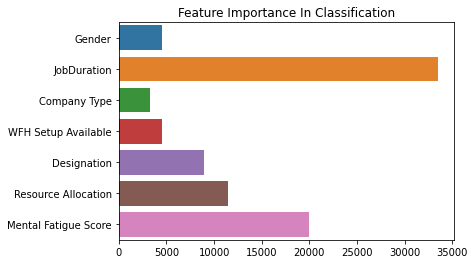

In [ ]:
import seaborn as sns
fig = sns.barplot(y=features, x=gbm.feature_importances_, orient='h')
fig.set(title = 'Feature Importance In Classification');